In [1]:
import plotly.express as px
import pandas as pd

from collections import defaultdict

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
alldf = pd.read_csv("../data/prep/clean_ruddit.csv")
raw_X, y = list(alldf["clean_text"].str.split().values), list(alldf["score"].values)

In [4]:
tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda doc: doc,
    preprocessor=lambda doc: doc,
    token_pattern=None
)
X = tfidf.fit_transform(raw_X)

In [5]:
A = X.todense()
print(A.shape)
df = pd.DataFrame(A)
df["y"] = y

(5708, 11416)


In [6]:
# conteo de unigramas
unigram_count = defaultdict(int)
for text in alldf["clean_text"]:
    toks = text.split()
    for token in toks:
        unigram_count[token] +=1

top20_unigrams = pd.DataFrame(sorted(unigram_count.items(), key=lambda x: x[1])[::-1], columns=["word", "count"])[:20]
top20_unigrams.head()

,word,count
0,i,5748
1,not,4027
2,people,1064
3,like,915
4,think,727


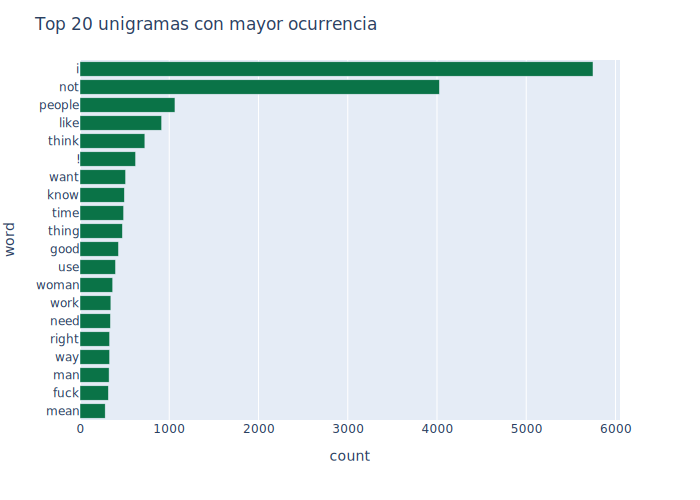

In [10]:
fig = px.bar(
    top20_unigrams.sort_values(by="count"),
    x="count",
    y="word",
    orientation="h",
    color=["#0a7347"] * top20_unigrams.shape[0],
    color_discrete_map="identity"
)
fig.update_layout(title="Top 20 unigramas con mayor ocurrencia")
fig.show("svg")

In [37]:
top20_vocab = {word: tfidf.vocabulary_[word] for word in top20_unigrams["word"]}
top20_X = df[[i for i in top20_vocab.values()] + ["y"]]
top20_X = top20_X.rename(columns={top20_vocab[word]: word for word in top20_vocab})

In [39]:
top20_X.corr().loc[:, "y"]

i        -0.033363
not       0.066331
people    0.084843
like      0.052157
think     0.012892
!        -0.018407
want      0.069977
know      0.029491
time     -0.017660
thing     0.001997
good     -0.061653
use       0.017541
woman     0.071359
work      0.011259
need      0.017207
right     0.030708
way      -0.010798
man       0.036538
fuck      0.429701
mean      0.012508
y         1.000000
Name: y, dtype: float64

In [41]:
from scipy.stats import pearsonr

_, pvalue = pearsonr(top20_X["fuck"], top20_X["y"])

print(pvalue) # menor al 5% - estadísticamente significante - rechazar hipótesis nula

2.9238345091590254e-255
